## Misura dell'Efficienza dei Rivelatori (updated to 27th November 2024)

Dimensioni rivelatori: 



Questo notebook contiene la misura dell'efficienza dei tre scintillatori calcolata sfruttando le coincidenze doppie e triple mediante la formula:

$\epsilon_{riv} = \frac{N_{triple}}{N_{doppie}}$



Tensioni: 

I conteggi vengono effettuati ogni 5 minuti.

$\Delta t$ = 50 $ns$


* N.B.: Non si è tenuto conto delle coincidenze accidentali


### Esempio: Efficienza del Primo Rivelatore

Sfruttiamo le coincidenze triple. Le coincidenze doppie sono relative al secondo e al terzo rivelatore: 




$N_{triple} = N_{\mu} \, \epsilon_1 \, \epsilon_2 \, \epsilon_3$,

$N_{doppie} = N_{\mu}\, \epsilon_2 \,\epsilon_3$ $=$ $N_{2,3} $ 

$\Rightarrow$ $\epsilon_1 = \frac{N_{triple}}{N_{2,3}} $

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [25]:
# LateX font:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

### Crea i DataFrames con tutte le coincidenze doppie e triple

## Studio dell'Efficienza dello Scintillatore 1

* Voltaggi degli Scintillatori 2 e 3:  $V = 1050 \,V$
* Threshold degli Scintillatori 2 e 3:  $Th = 70 \,meV$


Variamo il voltaggio e la threshold per trovare il punto in cui l'efficienza dello Scintillatore 1 è massima.

## V = 1150 V

In [26]:
# Rivelatore 1 : le doppie sono 2,3

data_1 = {
        'V [V]': np.full(6, 1150),
        'Th [meV]' : [0, 10, 12, 15, 20, 30, ],
    
        'N_singole_1': [221221, 64650, 52594,
                        45709, 
                        32490, 17421, ],
        'N_singole_2': [8198, 8301, 8227,
                        8044,
                        8198, 8127, ],
        'N_singole_3': [8816, 8835, 8728,
                        8624,
                        8767, 8534,],
    
        'N_doppie_12' : [6856, 6818, 6776,
                         6578, 
                         6659, 5974, ],
        'N_doppie_13' : [7180, 7107, 6958,
                         6830,
                         6815, 6085, ],
        'N_doppie_23' : [5705, 5795, 5746,
                         5624,
                         5757, 5626],
    
        'N_triple' : [5672, 5758, 5697,
                      5541,
                      5604, 4944],
}
df_1= pd.DataFrame(data_1)

In [27]:
# Doppie accidentali : 
delta_t = 50*10**(-9) # s

N_doppie_acc_12 = df_1['N_singole_1']/(5*60) * df_1['N_singole_2']/(5*60) * delta_t
N_doppie_acc_13 = df_1['N_singole_1']/(5*60) * df_1['N_singole_3']/(5*60) * delta_t
N_doppie_acc_23 = df_1['N_singole_2']/(5*60) * df_1['N_singole_3']/(5*60) * delta_t

# Coincidenze triple : 
N_triple_acc = df_1['N_singole_1']/(5*60) * df_1['N_singole_2']/(5*60) * df_1['N_singole_3']/(5*60) * delta_t * delta_t

In [28]:
df_acc = pd.DataFrame({
    'N_acc_12': N_doppie_acc_12,
    'N_acc_13': N_doppie_acc_13,
    'N_acc_23': N_doppie_acc_23,
    'N_acc': N_triple_acc
})

df_acc

,N_acc_12,N_acc_13,N_acc_23,N_acc
0,0.001008,0.001083,0.000040,1.480410e-09
1,0.000298,0.000317,0.000041,4.390174e-10
2,0.000240,0.000255,0.000040,3.496783e-10
3,0.000204,0.000219,0.000039,2.936018e-10
4,0.000148,0.000158,0.000040,2.162145e-10
5,0.000079,0.000083,0.000039,1.118748e-10


In [29]:
# Calcola e aggiungi le efficienze ai rispettivi DataFrames 

df_1['epsilon_1'] = df_1['N_triple']/df_1['N_doppie_23']
df_1['sigma_epsilon_1'] = np.sqrt(df_1['epsilon_1']/df_1['N_doppie_23'] * (1 - df_1['epsilon_1']))


In [30]:
# Crea degli array con i valori delle efficienze per creare
# un DataFrame separato

epsilon_1 = df_1['epsilon_1']
sigma_epsilon_1 = df_1['sigma_epsilon_1']

In [31]:
# DataFrame delle efficienze 

df_eff = pd.DataFrame({
    'epsilon_1' : epsilon_1,
    'sigma_epsilon_1' : sigma_epsilon_1,
    
})

In [32]:
df_eff

,epsilon_1,sigma_epsilon_1
0,0.994216,0.001004
1,0.993615,0.001046
2,0.991472,0.001213
3,0.985242,0.001608
4,0.973424,0.002120
5,0.878777,0.004351


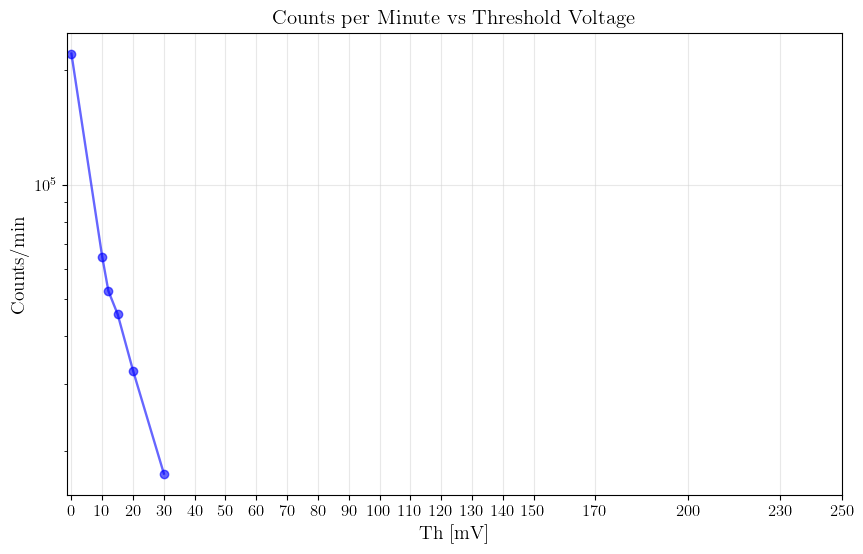

In [33]:
plt.figure(figsize=(10, 6))

plt.plot(df_1['Th [meV]'], df_1['N_singole_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 170, 200, 230, 250], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
# plt.text(40, 6000, 'V = 1150 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

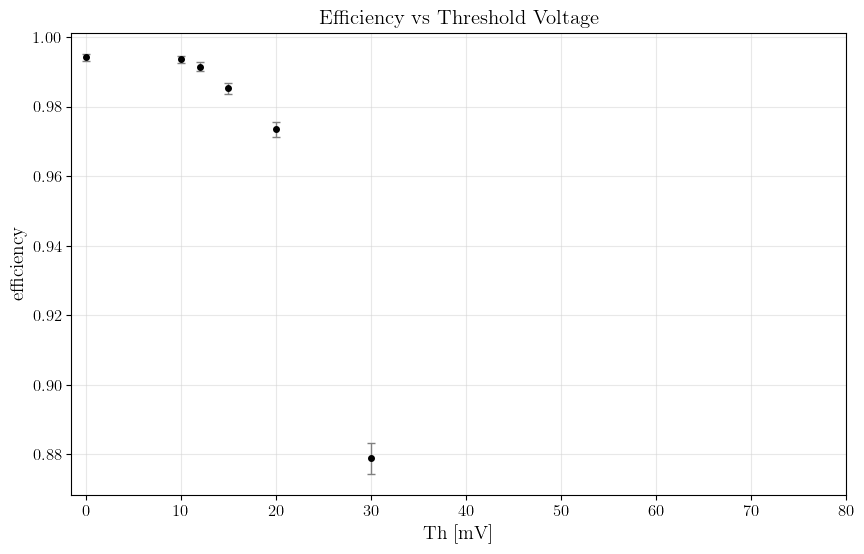

In [34]:
plt.figure(figsize=(10, 6))

# Plot with error bars
plt.errorbar(df_1['Th [meV]'], df_1['epsilon_1'], markersize = 4,
             yerr=df_1['sigma_epsilon_1'],   # Error bar values
             fmt='o', linewidth=0, color='black',  # Marker and line settings
             ecolor='gray', elinewidth=1, capsize=3)  # Error bar style

plt.title('Efficiency vs Threshold Voltage', fontsize=15)
plt.xlabel('Th [mV]', fontsize=14)
plt.ylabel('efficiency', fontsize=14)
plt.grid(True, color='lightgray', alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot:
# plt.text(40, 60000, 'V = 1000 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()


## V = 1200 V

In [4]:
# Rivelatore 1 : le doppie sono 2,3

data_2 = {
        'V [V]': np.full(7, 1200),
        'Th [meV]' : [0, 10, 15, 20, 25, 30, 40],
    
        'N_singole_1': [356849, 122792, 81271, 58425, 43843,
                        34813, 22441, ],
        'N_singole_2': [8047, 8089, 8161, 8103, 8093,
                        8216, 8083,],
        'N_singole_3': [8701, 8682, 8750, 8747, 8762,
                        8665, 8620,],
    
        'N_doppie_12' : [6778, 6744, 6706, 6669, 6649,
                         6664, 6251,],
        'N_doppie_13' : [7095, 7021, 7008, 6965, 6974,
                         6768, 6504,],
        'N_doppie_23' : [5636, 5660, 5682, 5642, 5736,
                         5697, 5668],
    
        'N_triple' : [5608, 5626, 5639, 5606, 5674,
                      5557, 5263],
}
df_2 = pd.DataFrame(data_2)

In [5]:
# Doppie accidentali : 
delta_t = 50*10**(-9) # s

N_doppie_acc_12 = df_2['N_singole_1']/(5*60) * df_2['N_singole_2']/(5*60) * delta_t
N_doppie_acc_13 = df_2['N_singole_1']/(5*60) * df_2['N_singole_3']/(5*60) * delta_t
N_doppie_acc_23 = df_2['N_singole_2']/(5*60) * df_2['N_singole_3']/(5*60) * delta_t

# Coincidenze triple : 
N_triple_acc = df_2['N_singole_1']/(5*60) * df_2['N_singole_2']/(5*60) * df_2['N_singole_3']/(5*60) * delta_t * delta_t

In [6]:
df_acc = pd.DataFrame({
    'N_acc_12': N_doppie_acc_12,
    'N_acc_13': N_doppie_acc_13,
    'N_acc_23': N_doppie_acc_23,
    'N_acc': N_triple_acc
})

df_acc

,N_acc_12,N_acc_13,N_acc_23,N_acc
0,0.001595,0.001725,0.000039,2.313470e-09
1,0.000552,0.000592,0.000039,7.984743e-10
2,0.000368,0.000395,0.000040,5.373575e-10
3,0.000263,0.000284,0.000039,3.834246e-10
4,0.000197,0.000213,0.000039,2.878653e-10
5,0.000159,0.000168,0.000040,2.294810e-10
6,0.000101,0.000107,0.000039,1.447766e-10


In [7]:
# Calcola e aggiungi le efficienze ai rispettivi DataFrames 

df_2['epsilon_1'] = df_2['N_triple']/df_2['N_doppie_23']
df_2['sigma_epsilon_1'] = np.sqrt(df_2['epsilon_1']/df_2['N_doppie_23'] * (1 - df_2['epsilon_1']))


In [8]:
# Crea degli array con i valori delle efficienze per creare
# un DataFrame separato

epsilon_1 = df_2['epsilon_1']
sigma_epsilon_1 = df_2['sigma_epsilon_1']

In [9]:
# DataFrame delle efficienze 

df_eff = pd.DataFrame({
    'epsilon_1' : epsilon_1,
    'sigma_epsilon_1' : sigma_epsilon_1,
    
})

In [10]:
df_eff

,epsilon_1,sigma_epsilon_1
0,0.995032,0.000937
1,0.993993,0.001027
2,0.992432,0.001150
3,0.993619,0.001060
4,0.989191,0.001365
5,0.975426,0.002051
6,0.928546,0.003421


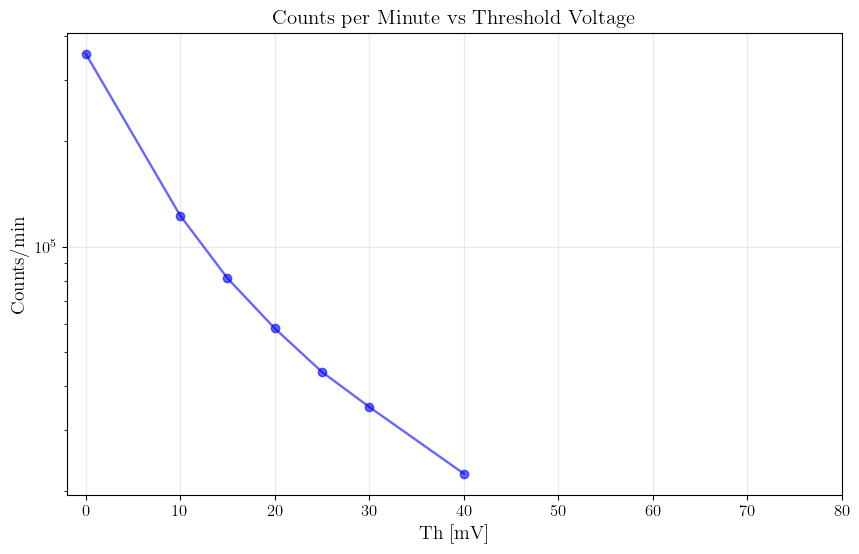

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(df_2['Th [meV]'], df_2['N_singole_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
#plt.text(40, 6000, 'V = 1200 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

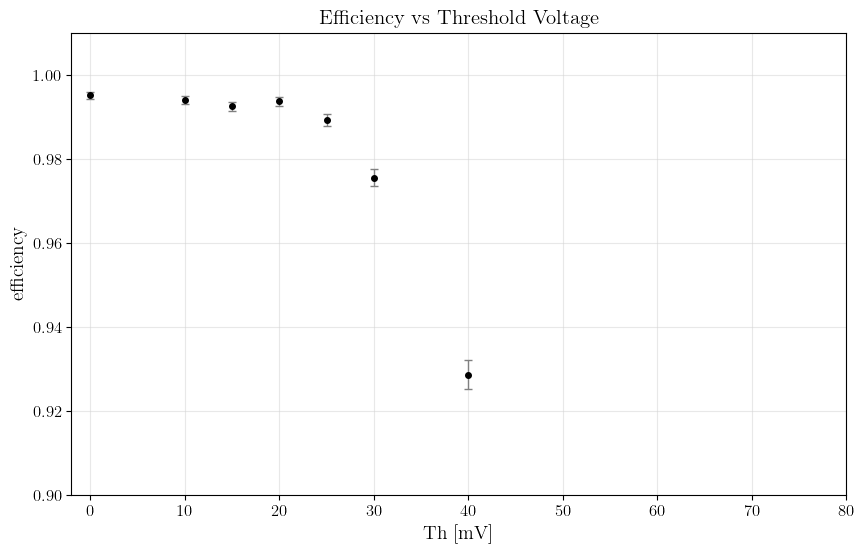

In [12]:
plt.figure(figsize=(10, 6))

# Plot with error bars
plt.errorbar(df_2['Th [meV]'], df_2['epsilon_1'], markersize = 4,
             yerr=df_2['sigma_epsilon_1'],   # Error bar values
             fmt='o', linewidth=0, color='black',  # Marker and line settings
             ecolor='gray', elinewidth=1, capsize=3)  # Error bar style

plt.title('Efficiency vs Threshold Voltage', fontsize=15)
plt.xlabel('Th [mV]', fontsize=14)
plt.ylabel('efficiency', fontsize=14)
plt.grid(True, color='lightgray', alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)
plt.ylim(0.9, 1.01)

# Add the fixed value of V to the plot:
# plt.text(40, 60000, 'V = 1000 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

## V = 1100 V

In [88]:
# Rivelatore 1 : le doppie sono 2,3

data_3 = {
        'V [V]': np.full(9, 1100),
        'Th [meV]' : [0, 5, 10, 15, 20, 25, 30,  
                      50, 70,],
    
        'N_singole_1': [219311, 197441, 141153, 106719, 80962, 63119, 50751, 
                        25201, 14353,],
        'N_singole_2': [8108, 7998, 7844, 7865, 7604, 7840, 8010, 
                        8006, 7879, ],
        'N_singole_3': [8639, 8520, 8647, 8496, 8345, 8496, 8618, 
                        8538, 8447, ],
    
        'N_doppie_12' : [6832, 6714, 6544, 6522, 6325, 6465, 6631, 
                         6342, 5372, ],
        'N_doppie_13' : [7051, 6934, 6950, 6818, 6640, 6729, 6897, 
                         6536, 5531, ],
        'N_doppie_23' : [5660, 5570, 5565, 5500, 5362, 5491, 5633, 
                         5645, 5463, ],
    
        'N_triple' : [5624, 5528, 5523, 5460, 5323, 5442, 5573, 
                      5321, 4422],
}
df_3 = pd.DataFrame(data_3)

In [89]:
# Doppie accidentali : 
delta_t = 50*10**(-9) # s

N_doppie_acc_12 = df_3['N_singole_1']/(5*60) * df_3['N_singole_2']/(5*60) * delta_t
N_doppie_acc_13 = df_3['N_singole_1']/(5*60) * df_3['N_singole_3']/(5*60) * delta_t
N_doppie_acc_23 = df_3['N_singole_2']/(5*60) * df_3['N_singole_3']/(5*60) * delta_t

# Coincidenze triple : 
N_triple_acc = df_3['N_singole_1']/(5*60) * df_3['N_singole_2']/(5*60) * df_3['N_singole_3']/(5*60) * delta_t * delta_t

In [90]:
df_acc = pd.DataFrame({
    'N_acc_12': N_doppie_acc_12,
    'N_acc_13': N_doppie_acc_13,
    'N_acc_23': N_doppie_acc_23,
    'N_acc': N_triple_acc
})

df_acc

,N_acc_12,N_acc_13,N_acc_23,N_acc
0,0.000988,0.001053,0.000039,1.422374e-09
1,0.000877,0.000935,0.000038,1.245761e-09
2,0.000615,0.000678,0.000038,8.864809e-10
3,0.000466,0.000504,0.000037,6.602847e-10
4,0.000342,0.000375,0.000035,4.756921e-10
5,0.000275,0.000298,0.000037,3.892843e-10
6,0.000226,0.000243,0.000038,3.243843e-10
7,0.000112,0.000120,0.000038,1.595019e-10
8,0.000063,0.000067,0.000037,8.844892e-11


In [91]:
# Calcola e aggiungi le efficienze ai rispettivi DataFrames 

df_3['epsilon_1'] = df_3['N_triple']/df_3['N_doppie_23']
df_3['sigma_epsilon_1'] = np.sqrt(df_3['epsilon_1']/df_3['N_doppie_23'] * (1 - df_3['epsilon_1']))

In [92]:
# Crea degli array con i valori delle efficienze per creare
# un DataFrame separato

epsilon_1 = df_3['epsilon_1']
sigma_epsilon_1 = df_3['sigma_epsilon_1']

In [93]:
# DataFrame efficienze : 
df_eff = pd.DataFrame({
    'epsilon_1' : epsilon_1,
    'sigma_epsilon_1' : sigma_epsilon_1,
    
})

df_eff

,epsilon_1,sigma_epsilon_1
0,0.993640,0.001057
1,0.992460,0.001159
2,0.992453,0.001160
3,0.992727,0.001146
4,0.992727,0.001160
5,0.991076,0.001269
6,0.989348,0.001368
7,0.942604,0.003096
8,0.809445,0.005314


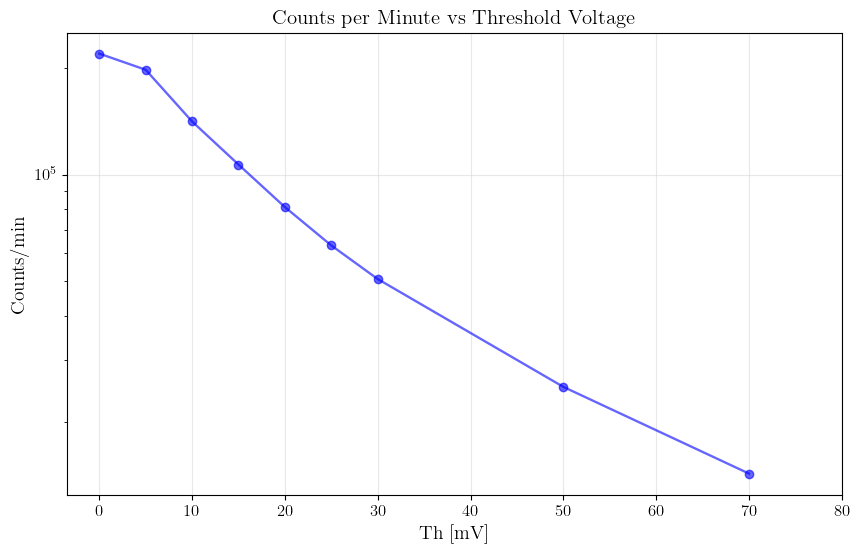

In [94]:
plt.figure(figsize=(10, 6))

plt.plot(df_3['Th [meV]'], df_3['N_singole_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
#plt.text(40, 6000, 'V = 1200 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

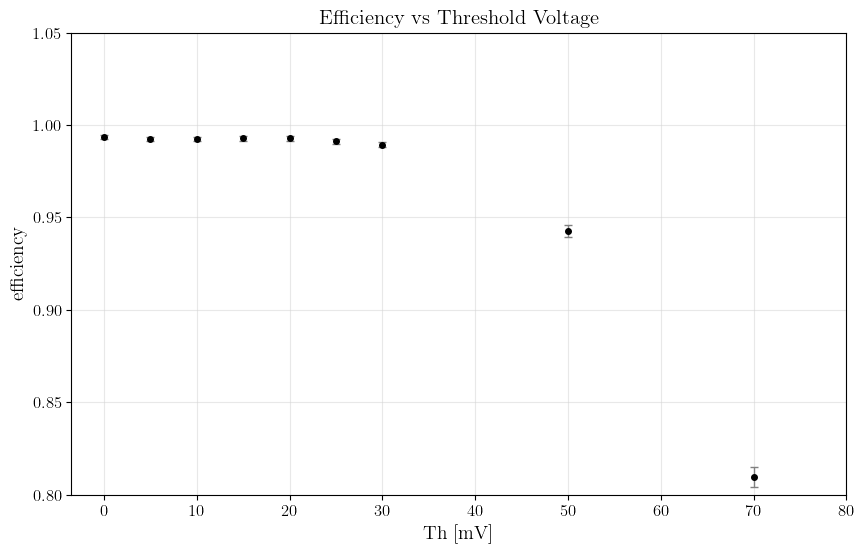

In [96]:
plt.figure(figsize=(10, 6))

# Plot with error bars
plt.errorbar(df_3['Th [meV]'], df_3['epsilon_1'], markersize = 4,
             yerr=df_3['sigma_epsilon_1'],   # Error bar values
             fmt='o', linewidth=0, color='black',  # Marker and line settings
             ecolor='gray', elinewidth=1, capsize=3)  # Error bar style

plt.title('Efficiency vs Threshold Voltage', fontsize=15)
plt.xlabel('Th [mV]', fontsize=14)
plt.ylabel('efficiency', fontsize=14)
plt.grid(True, color='lightgray', alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)
plt.ylim(0.8, 1.05)

# Add the fixed value of V to the plot:
# plt.text(40, 60000, 'V = 1000 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

## V = 1250 V

In [172]:
# Rivelatore 1 : le doppie sono 2,3

data_4 = {
        'V [V]': np.full(9, 1250),
        'Th [meV]' : [0, 5, 10, 15, 20, 25, 30, 40, 60],
    
        'N_singole_1': [456199, 193459, 137858, 103335, 79162, 61376, 48985, 33175, 17795, ],
        'N_singole_2': [7971, 7784, 7880, 8022, 8159, 7691, 7789, 7780, 7977, ],
        'N_singole_3': [8699, 8440, 8679, 8639, 8578, 8376, 8453, 8454, 8490, ],
    
        'N_doppie_12' : [6798, 6575, 6596, 6678, 6760, 6395, 6441, 6304, 5859, ],
        'N_doppie_13' : [7228, 6881, 6964, 6967, 6981, 6708, 6682, 6561, 6048, ],
        'N_doppie_23' : [5658, 5491, 5625, 5621, 5739, 5465, 5503, 5453, 5584, ],
    
        'N_triple' : [5629, 5453, 5572, 5580, 5694, 5434, 5435, 5315, 4928],
}
df_4 = pd.DataFrame(data_4)

In [173]:
# Doppie accidentali : 
delta_t = 50*10**(-9) # s

N_doppie_acc_12 = df_4['N_singole_1']/(5*60) * df_4['N_singole_2']/(5*60) * delta_t
N_doppie_acc_13 = df_4['N_singole_1']/(5*60) * df_4['N_singole_3']/(5*60) * delta_t
N_doppie_acc_23 = df_4['N_singole_2']/(5*60) * df_4['N_singole_3']/(5*60) * delta_t

# Coincidenze triple : 
N_triple_acc = df_4['N_singole_1']/(5*60) * df_4['N_singole_2']/(5*60) * df_4['N_singole_3']/(5*60) * delta_t * delta_t

In [174]:
df_acc = pd.DataFrame({
    'N_acc_12': N_doppie_acc_12,
    'N_acc_13': N_doppie_acc_13,
    'N_acc_23': N_doppie_acc_23,
    'N_acc': N_triple_acc
})

df_acc

,N_acc_12,N_acc_13,N_acc_23,N_acc
0,0.002020,0.002205,0.000039,2.928955e-09
1,0.000837,0.000907,0.000036,1.176821e-09
2,0.000604,0.000665,0.000038,8.729797e-10
3,0.000461,0.000496,0.000039,6.630859e-10
4,0.000359,0.000377,0.000039,5.129984e-10
5,0.000262,0.000286,0.000036,3.660954e-10
6,0.000212,0.000230,0.000037,2.986290e-10
7,0.000143,0.000156,0.000037,2.020361e-10
8,0.000079,0.000084,0.000038,1.115890e-10


In [175]:
# Calcola e aggiungi le efficienze ai rispettivi DataFrames 

df_4['epsilon_1'] = df_4['N_triple']/df_4['N_doppie_23']
df_4['sigma_epsilon_1'] = np.sqrt(df_4['epsilon_1']/df_4['N_doppie_23'] * (1 - df_4['epsilon_1']))

In [176]:
# Crea degli array con i valori delle efficienze per creare
# un DataFrame separato

epsilon_1 = df_4['epsilon_1']
sigma_epsilon_1 = df_4['sigma_epsilon_1']

In [177]:
# DataFrame efficienze : 
df_eff = pd.DataFrame({
    'epsilon_1' : epsilon_1,
    'sigma_epsilon_1' : sigma_epsilon_1,
    
})

df_eff

,epsilon_1,sigma_epsilon_1
0,0.994875,0.000949
1,0.993080,0.001119
2,0.990578,0.001288
3,0.992706,0.001135
4,0.992159,0.001164
5,0.994328,0.001016
6,0.987643,0.001489
7,0.974693,0.002127
8,0.882521,0.004309


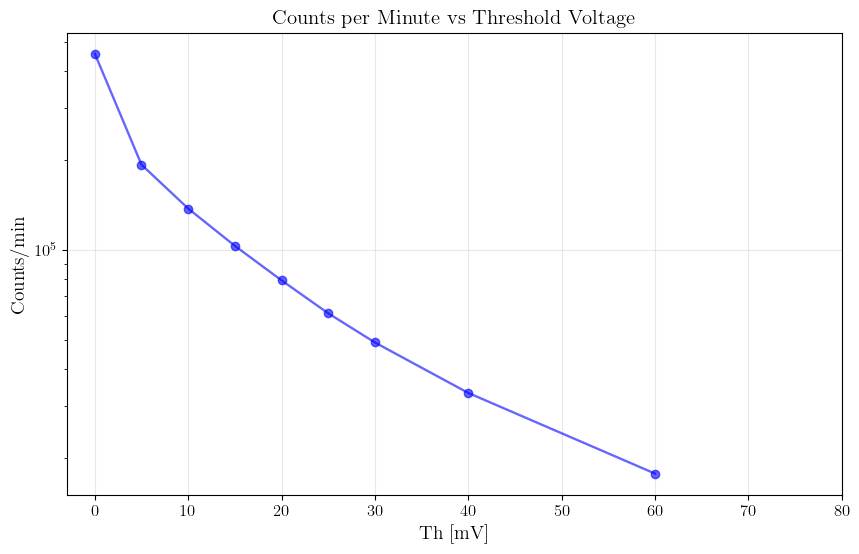

In [178]:
plt.figure(figsize=(10, 6))

plt.plot(df_4['Th [meV]'], df_4['N_singole_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
#plt.text(40, 6000, 'V = 1200 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

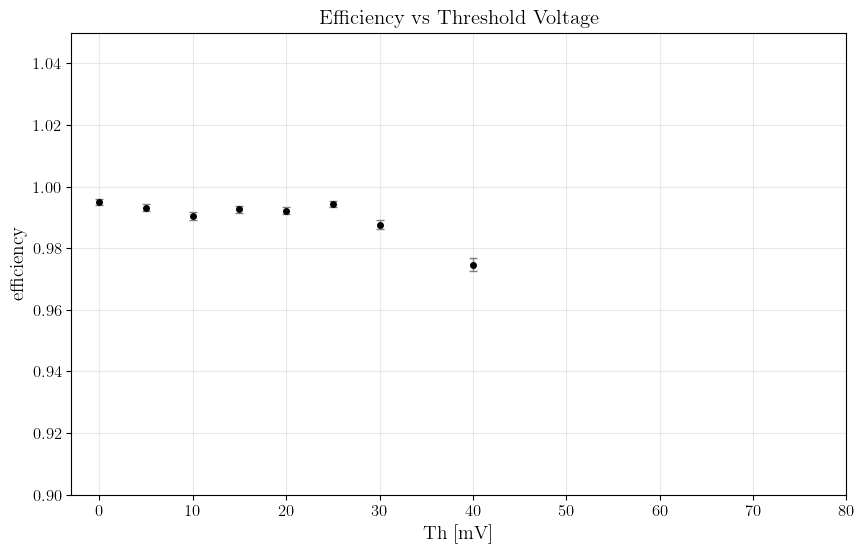

In [179]:
plt.figure(figsize=(10, 6))

# Plot with error bars
plt.errorbar(df_4['Th [meV]'], df_4['epsilon_1'], markersize = 4,
             yerr=df_4['sigma_epsilon_1'],   # Error bar values
             fmt='o', linewidth=0, color='black',  # Marker and line settings
             ecolor='gray', elinewidth=1, capsize=3)  # Error bar style

plt.title('Efficiency vs Threshold Voltage', fontsize=15)
plt.xlabel('Th [mV]', fontsize=14)
plt.ylabel('efficiency', fontsize=14)
plt.grid(True, color='lightgray', alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)
plt.ylim(0.9, 1.05)

# Add the fixed value of V to the plot:
# plt.text(40, 60000, 'V = 1000 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

# V = 1050 V

In [ ]:
# Rivelatore 1 : le doppie sono 2,3

data_5 = {
        'V [V]': np.full(1,),
        'Th [meV]' : [0, 5],
    
        'N_singole_1': [141458, 53119, ],
        'N_singole_2': [7742, 7828, ],
        'N_singole_3': [8305, 8478, ],
    
        'N_doppie_12' : [6496, 6467, ],
        'N_doppie_13' : [6750, 6699, ],
        'N_doppie_23' : [5403, 5420, ],
    
        'N_triple' : [5403, 5379, ],
}
df_5 = pd.DataFrame(data_5)

In [ ]:
# Doppie accidentali : 
delta_t = 50*10**(-9) # s

N_doppie_acc_12 = df_5['N_singole_1']/(5*60) * df_5['N_singole_2']/(5*60) * delta_t
N_doppie_acc_13 = df_5['N_singole_1']/(5*60) * df_5['N_singole_3']/(5*60) * delta_t
N_doppie_acc_23 = df_5['N_singole_2']/(5*60) * df_5['N_singole_3']/(5*60) * delta_t

# Coincidenze triple : 
N_triple_acc = df_5['N_singole_1']/(5*60) * df_5['N_singole_2']/(5*60) * df_5['N_singole_3']/(5*60) * delta_t * delta_t

In [ ]:
df_acc = pd.DataFrame({
    'N_acc_12': N_doppie_acc_12,
    'N_acc_13': N_doppie_acc_13,
    'N_acc_23': N_doppie_acc_23,
    'N_acc': N_triple_acc
})

df_acc

In [ ]:
# Calcola e aggiungi le efficienze ai rispettivi DataFrames 

df_5['epsilon_1'] = df_5['N_triple']/df_5['N_doppie_23']
df_5['sigma_epsilon_1'] = np.sqrt(df_5['epsilon_1']/df_5['N_doppie_23'] * (1 - df_5['epsilon_1']))

In [ ]:
# DataFrame efficienze : 
df_eff = pd.DataFrame({
    'epsilon_1' : epsilon_1,
    'sigma_epsilon_1' : sigma_epsilon_1,
    
})

df_eff

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df_5['Th [meV]'], df_5['N_singole_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
#plt.text(40, 6000, 'V = 1200 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Plot with error bars
plt.errorbar(df_5['Th [meV]'], df_5['epsilon_1'], markersize = 4,
             yerr=df_5['sigma_epsilon_1'],   # Error bar values
             fmt='o', linewidth=0, color='black',  # Marker and line settings
             ecolor='gray', elinewidth=1, capsize=3)  # Error bar style

plt.title('Efficiency vs Threshold Voltage', fontsize=15)
plt.xlabel('Th [mV]', fontsize=14)
plt.ylabel('efficiency', fontsize=14)
plt.grid(True, color='lightgray', alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)
plt.ylim(0.9, 1.05)

# Add the fixed value of V to the plot:
# plt.text(40, 60000, 'V = 1000 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

# V = V

In [ ]:
# Rivelatore 1 : le doppie sono 2,3

data_6 = {
        'V [V]': np.full(1,),
        'Th [meV]' : [0, ],
    
        'N_singole_1': [],
        'N_singole_2': [],
        'N_singole_3': [],
    
        'N_doppie_12' : [ ],
        'N_doppie_13' : [],
        'N_doppie_23' : [],
    
        'N_triple' : [],
}
df_6 = pd.DataFrame(data_6)

In [ ]:
# Doppie accidentali : 
delta_t = 50*10**(-9) # s

N_doppie_acc_12 = df_6['N_singole_1']/(5*60) * df_6['N_singole_2']/(5*60) * delta_t
N_doppie_acc_13 = df_6['N_singole_1']/(5*60) * df_6['N_singole_3']/(5*60) * delta_t
N_doppie_acc_23 = df_6['N_singole_2']/(5*60) * df_6['N_singole_3']/(5*60) * delta_t

# Coincidenze triple : 
N_triple_acc = df_6['N_singole_1']/(5*60) * df_6['N_singole_2']/(5*60) * df_6['N_singole_3']/(5*60) * delta_t * delta_t

In [ ]:
df_acc = pd.DataFrame({
    'N_acc_12': N_doppie_acc_12,
    'N_acc_13': N_doppie_acc_13,
    'N_acc_23': N_doppie_acc_23,
    'N_acc': N_triple_acc
})

df_acc

In [ ]:
# Calcola e aggiungi le efficienze ai rispettivi DataFrames 

df_6['epsilon_1'] = df_6['N_triple']/df_6['N_doppie_23']
df_6['sigma_epsilon_1'] = np.sqrt(df_6['epsilon_1']/df_6['N_doppie_23'] * (1 - df_6['epsilon_1']))

In [ ]:
# DataFrame efficienze : 
df_eff = pd.DataFrame({
    'epsilon_1' : epsilon_1,
    'sigma_epsilon_1' : sigma_epsilon_1,
    
})

df_eff

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df_6['Th [meV]'], df_6['N_singole_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
#plt.text(40, 6000, 'V = 1200 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Plot with error bars
plt.errorbar(df_5['Th [meV]'], df_5['epsilon_1'], markersize = 4,
             yerr=df_5['sigma_epsilon_1'],   # Error bar values
             fmt='o', linewidth=0, color='black',  # Marker and line settings
             ecolor='gray', elinewidth=1, capsize=3)  # Error bar style

plt.title('Efficiency vs Threshold Voltage', fontsize=15)
plt.xlabel('Th [mV]', fontsize=14)
plt.ylabel('efficiency', fontsize=14)
plt.grid(True, color='lightgray', alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)
plt.ylim(0.9, 1.05)

# Add the fixed value of V to the plot:
# plt.text(40, 60000, 'V = 1000 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

# Summary Plots

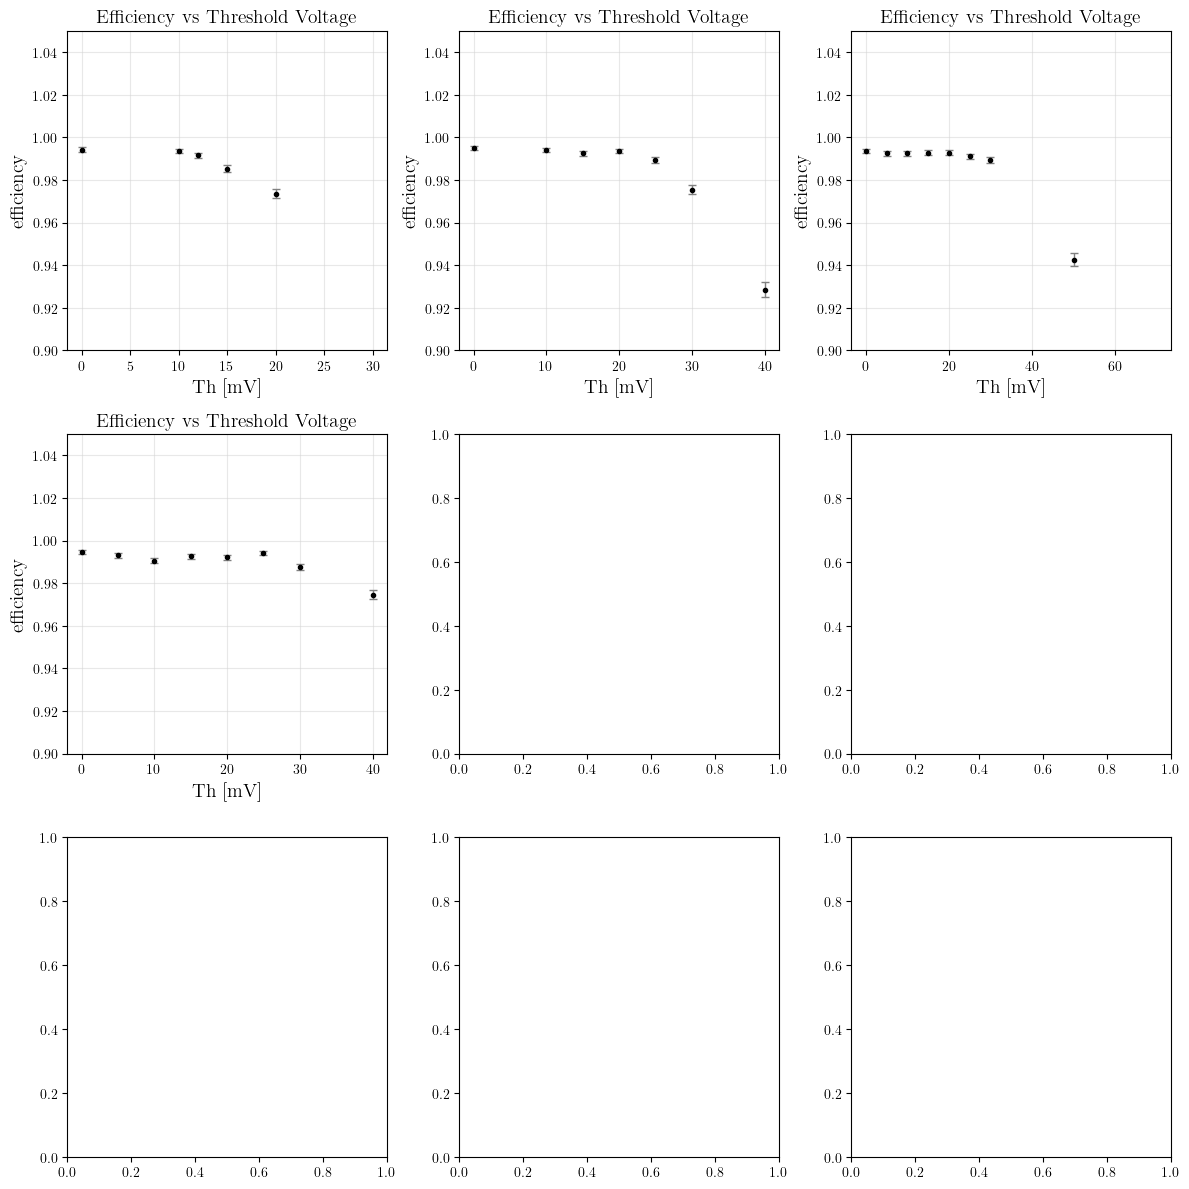

In [171]:
FONT_SIZE = 14
FONT_SIZE = 14
MARKER_SIZE = 3
LINE_WIDTH = 1
GRID_COLOR = 'lightgray'
GRID_ALPHA = 0.5

# List of dataframes and corresponding voltages
dataframes = [df_1, df_2, df_3, df_4]#  df_1250V, df_1300V]  # Replace/add your actual dataframes here
voltages = [800, 850, 900, 1250]#  1250, 1300]  # Replace/add the corresponding voltage values

# Create subplots grid (1 row per dataframe)
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 12), sharex=False, sharey=False)

# Appiattisci gli assi per iterare facilmente
axes_flat = axes.flatten()
# Loop over dataframes and axes
for i, (df, V) in enumerate(zip(dataframes, voltages)):
        ax = axes_flat[i]

        ax.errorbar(df['Th [meV]'], df['epsilon_1'], markersize = MARKER_SIZE,
                yerr=df['sigma_epsilon_1'],   # Error bar values
                fmt='o', linewidth=0, color='black',  # Marker and line settings
                ecolor='gray', elinewidth=1, capsize=3)  # Error bar style
        
        ax.set_title('Efficiency vs Threshold Voltage', fontsize = FONT_SIZE)
        ax.set_xlabel('Th [mV]', fontsize = FONT_SIZE)
        ax.set_ylabel('efficiency', fontsize = FONT_SIZE)
        #ax.set_xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize = FONT_SIZE)
        # Uncomment if needed (comment the previous line): 
        # plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
        #ax.set_yticks(fontsize = FONT_SIZE)
        ax.set_ylim(0.9, 1.05)
        ax.grid(True, color='lightgray', alpha = 0.5)


# Adjust layout
plt.tight_layout()
plt.show()